# Installing libraries

In [1]:
!pip install aif360
!pip install fairlearn
!pip install BlackBoxAuditing
!pip install adversarial-robustness-toolbox 
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=e30fe464d2a48ee11d368521009dd3d1b96a9c8f5bcfcebe52e481a425855f2c
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into accoun

# Pre-processing steps

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


In [3]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [4]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [5]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


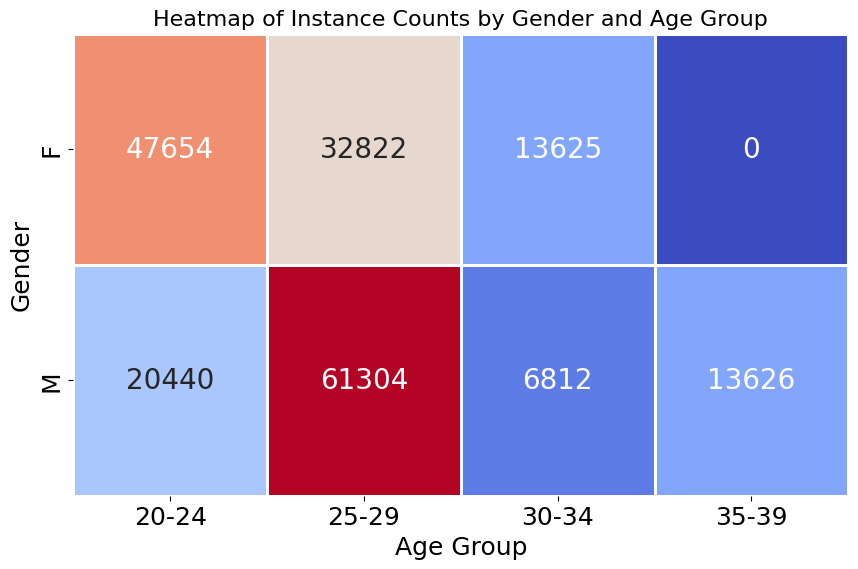


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

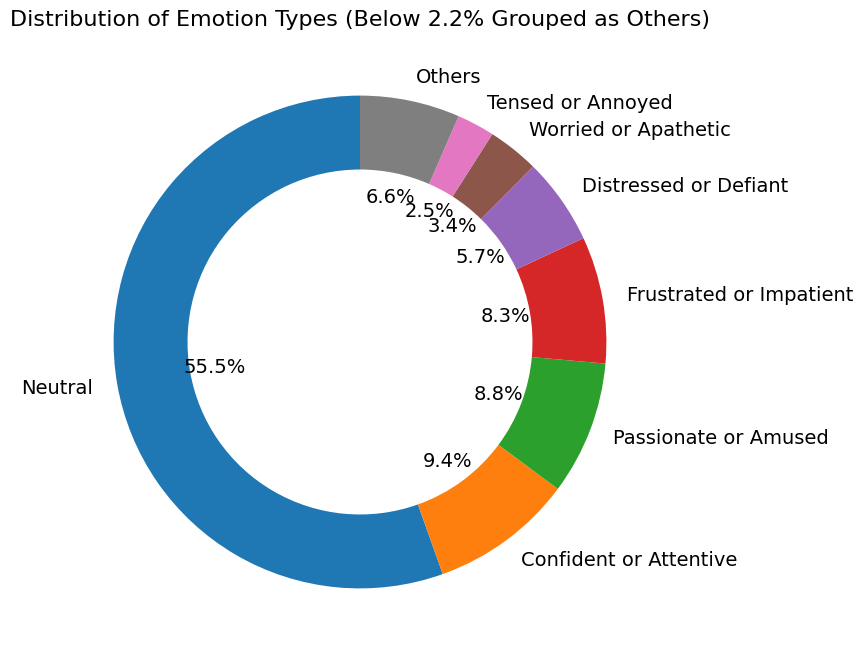


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

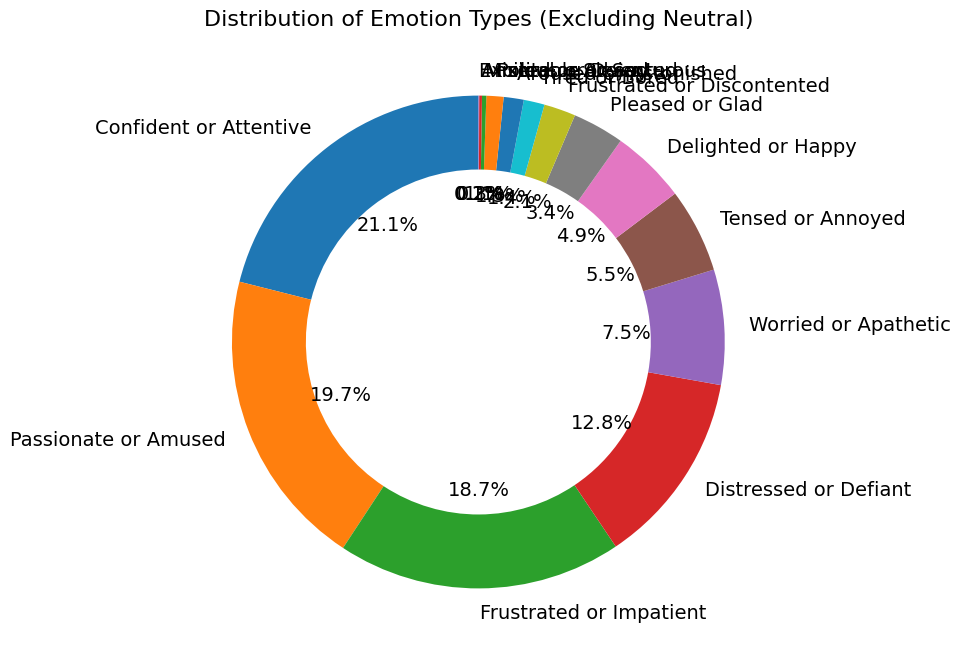


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


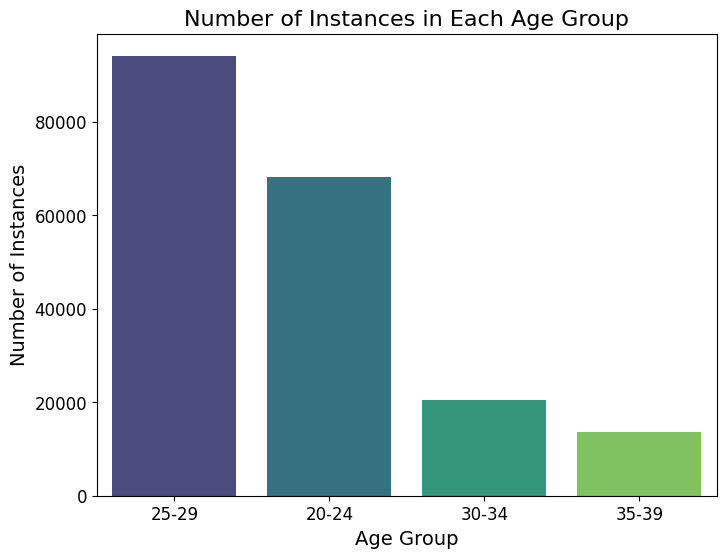


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


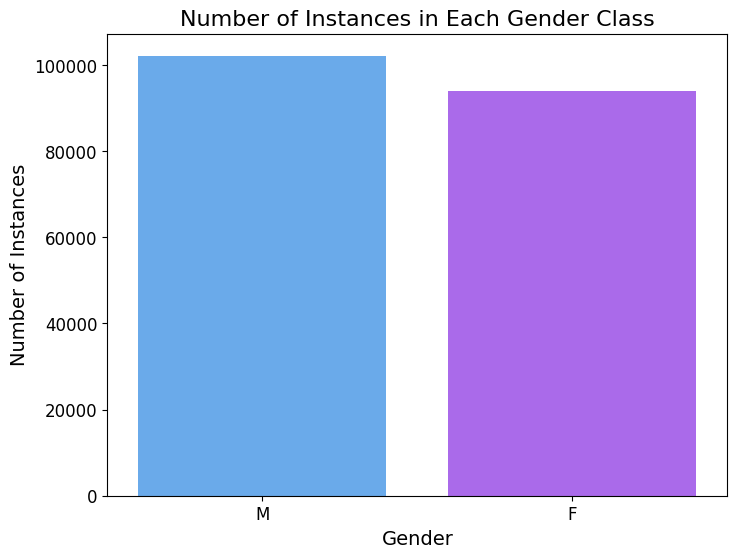

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 3629

Old Emotion Class Distribution (excluding neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



New Emotion Class Distribution (after ADASYN or SMOTE):
Counter({'Confident or Attentive': 18418, 'Passionate or Amused': 17212, 'Frustrated or Impatient': 16325, 'Distressed or Defiant': 11175, 'Worried or Apathetic': 6601, 'Tensed or Annoyed': 4845, 'Delighted or Happy': 4296, 'Frustrated or Discontented': 3792, 'Aroused or Astonished': 3735, 'Polite or Sleepy': 3679, 'Tired or Bored': 3647, 'Anxious or Dejected': 3635, 'Excited or Adventurous': 3634, 'Neutral': 3629, 'Pleased or Glad': 3627, 'Miserable or Sad': 3592})
Total Instances after balancing: 111842
       ecg        bvp        gsr        rsp        skt  emg_coru  emg_trap  \
0  1.49656  35.256968  28.300008  42.158323  31.222927  17.47300  24.12600   
1  0.82632  37.097290  10.227288  35.924741  19.958934   5.44000  10.57350   
2  0.86246  37.445991  15.029328  34.017875  27.541882   5.97400   7.04175   
3  0.89860  35.528134  10.522992  35.218136  20.151750   7.98625  11.47700   
4  0.87560  37.310379  24.664944  33.03062

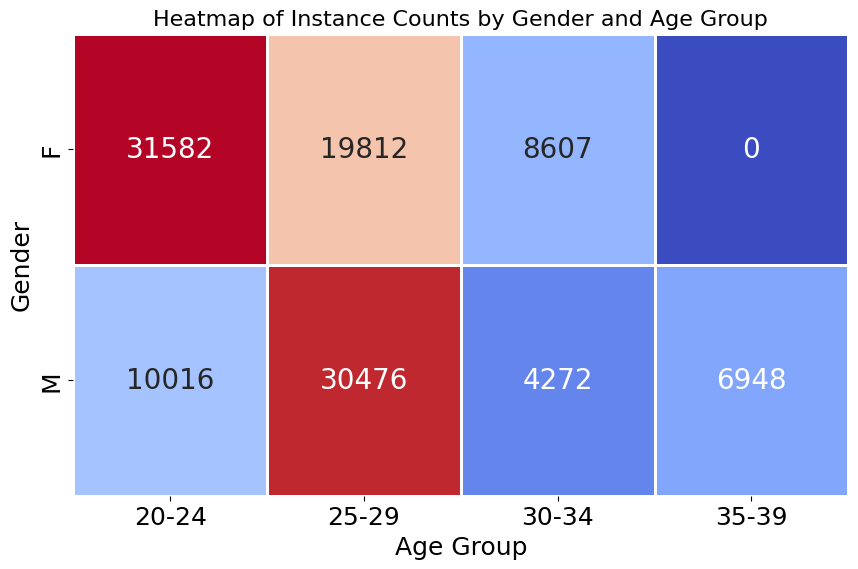


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Frustrated or Discontented     3792
Aroused or Astonished          3735
Polite or Sleepy               3679
Tired or Bored                 3647
Anxious or Dejected            3635
Excited or Adventurous         3634
Neutral                        3629
Pleased or Glad                3627
Miserable or Sad               3592
Name: count, dtype: int64
Total Instances in Emotion Distribution: 111842
Percentages for each class:
Emotion
Confident or Attentive        16.467874
Passionate or Amused          15.389567
Frustrated or Impatient       14.596484
Distressed or Defiant          9.991774
Worried or Apathetic           5.902076
Tensed or Annoyed              4.332004
Delighted or Happy             

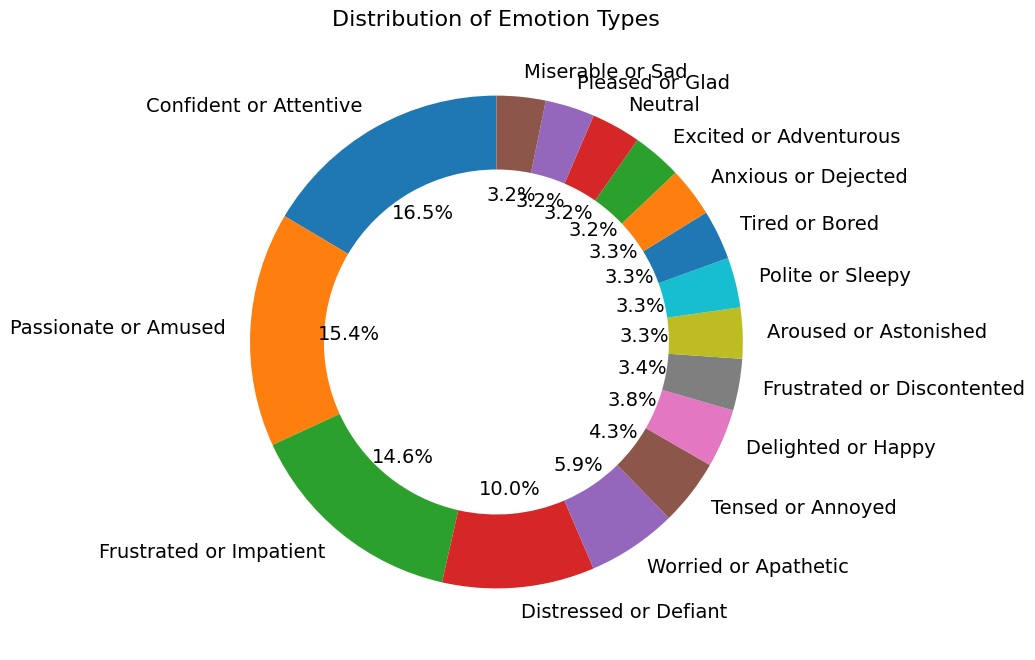


Age Group Distribution Information:
AGE
25-29    50289
20-24    41607
30-34    12879
35-39     6948
Name: count, dtype: int64
Total Instances in Age Group Distribution: 111723

Old vs New Age Group Counts (excluding Neutral):
25-29: Old=94126, New=50289, Difference=-43837
20-24: Old=68094, New=41607, Difference=-26487
30-34: Old=20437, New=12879, Difference=-7558
35-39: Old=13626, New=6948, Difference=-6678


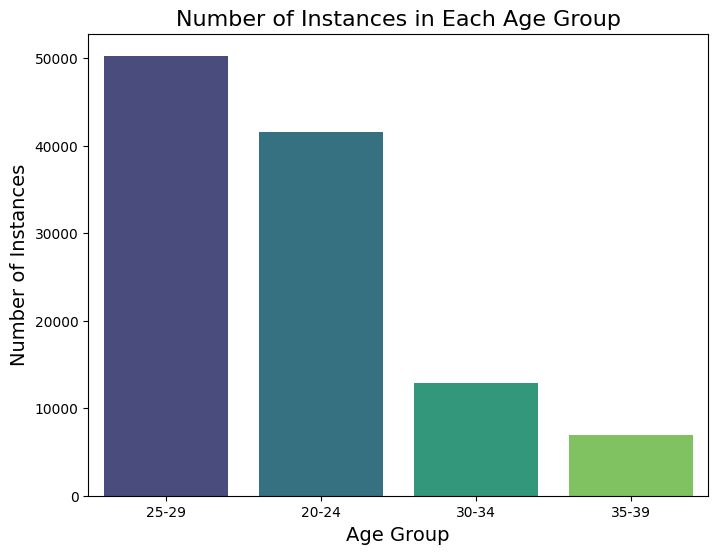


Gender Distribution Information:
GENDER
F    60050
M    51712
Name: count, dtype: int64
Total Instances in Gender Distribution: 111762

Old vs New Gender Class Counts (excluding Neutral):
M: Old=102182, New=51712, Difference=-50470
F: Old=94101, New=60050, Difference=-34051


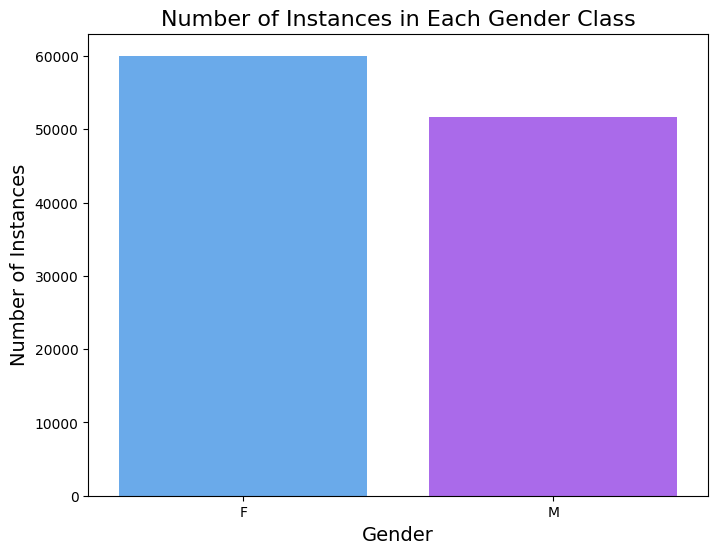

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    # Create a copy of the data to avoid modifying the original data
    df = data.copy()
    
    # Separate neutral emotion data from other emotions
    neutral_mask = df['Emotion'] == 'Neutral'
    df_neutral = df[neutral_mask]
    df_others = df[~neutral_mask]
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    # Print old number of instances per class (excluding neutral instances)
    print("\nOld Emotion Class Distribution (excluding neutral):")
    emotion_counts_excluding_neutral = emotion_counts.drop('Neutral', errors='ignore')
    print(emotion_counts_excluding_neutral)
    print(f"Total Instances before balancing: {emotion_counts_excluding_neutral.sum()}")

    # Undersample neutral class to target size
    if len(df_neutral) > target_size:
        neutral_indices = np.random.choice(df_neutral.index, target_size, replace=False)
        df_neutral_balanced = df_neutral.loc[neutral_indices]
    else:
        df_neutral_balanced = df_neutral
    
    # Prepare the data for resampling
    df_combined = pd.concat([df_neutral_balanced, df_others])
    X = df_combined.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df_combined['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        # Print new number of instances after balancing
        print("\nNew Emotion Class Distribution (after ADASYN or SMOTE):")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    print(df_resampled.head())
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    # 1. Heatmap for Gender and Age Distribution
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data
    
    # Print differences (excluding neutral)
    old_heatmap_data = old_data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    old_heatmap_data_excluding_neutral = old_heatmap_data.drop('Neutral', errors='ignore')
    print("\nOld vs New Heatmap Data (excluding Neutral):")
    print(old_heatmap_data_excluding_neutral.sum().sum(), " (Old) vs", heatmap_data.sum().sum(), " (New)")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

    # 2. Donut Chart for Emotion Distribution
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")  # Total instances in emotion data
    print("Percentages for each class:")
    print(emotion_percentages)
    
    # Print the difference in Emotion Classes (excluding Neutral)
    old_emotion_counts = old_data['Emotion'].value_counts()
    old_emotion_counts_excluding_neutral = old_emotion_counts.drop('Neutral', errors='ignore')
    print(f"Old Emotion Instances (excluding Neutral): {old_emotion_counts_excluding_neutral}")
    
    # Ignore neutral instances in old data count for diff calculation
    print("\nOld vs New Emotion Class Counts (excluding Neutral):")
    for emotion in old_emotion_counts_excluding_neutral.index:
        old_count = old_emotion_counts_excluding_neutral[emotion]
        new_count = emotion_counts.get(emotion, 0)
        diff = new_count - old_count
        print(f"{emotion}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()

    # 3. Bar Plot for Age Group Distribution
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")  # Total instances in age groups
    
    # Print differences in age groups (excluding neutral)
    old_age_counts = old_data['AGE'].value_counts()
    old_age_counts_excluding_neutral = old_age_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Age Group Counts (excluding Neutral):")
    for age_group in old_age_counts_excluding_neutral.index:
        old_count = old_age_counts_excluding_neutral[age_group]
        new_count = age_counts.get(age_group, 0)
        diff = new_count - old_count
        print(f"{age_group}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=age_counts.index,
        y=age_counts.values,
        palette='viridis'
    )
    plt.title('Number of Instances in Each Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

    # 4. Bar Plot for Gender Distribution
    print("\nGender Distribution Information:")
    gender_counts = data['GENDER'].value_counts()
    print(gender_counts)
    print(f"Total Instances in Gender Distribution: {gender_counts.sum()}")  # Total instances in gender classes
    
    # Print differences in gender classes (excluding neutral)
    old_gender_counts = old_data['GENDER'].value_counts()
    old_gender_counts_excluding_neutral = old_gender_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Gender Class Counts (excluding Neutral):")
    for gender in old_gender_counts_excluding_neutral.index:
        old_count = old_gender_counts_excluding_neutral[gender]
        new_count = gender_counts.get(gender, 0)
        diff = new_count - old_count
        print(f"{gender}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=gender_counts.index,
        y=gender_counts.values,
        palette='cool'
    )
    plt.title('Number of Instances in Each Gender Class', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

# Example workflow (replace 'data' with your dataset)
# data = pd.read_csv("your_dataset.csv")
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)


In [8]:
print(len(balanced_data))
df = balanced_data
df['AGE'] = df['AGE'].replace({'20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39'})
protected_attribute_names = ['AGE', 'GENDER']
df['AGE'] = df['AGE'].map({"20-29": 0, "30-39": 1})
df['GENDER'] = df['GENDER'].map({"F": 0, "M": 1})
emotion_labels = [
    'Neutral', 'Frustrated or Impatient', 'Tensed or Annoyed', 'Distressed or Defiant', 
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy', 
    'Worried or Apathetic', 'Frustrated or Discontented', 'Aroused or Astonished', 'Miserable or Sad', 
    'Anxious or Dejected', 'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'
]
label_to_num = {label: num for num, label in enumerate(emotion_labels)}
print("Emotion Labels and Corresponding Encodings:")
print(label_to_num)
df['Emotion'] = df['Emotion'].replace(label_to_num)
emotion_type_map = {'Positive': 1, 'Negative': 0}
df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


111842
Emotion Labels and Corresponding Encodings:
{'Neutral': 0, 'Frustrated or Impatient': 1, 'Tensed or Annoyed': 2, 'Distressed or Defiant': 3, 'Confident or Attentive': 4, 'Passionate or Amused': 5, 'Pleased or Glad': 6, 'Delighted or Happy': 7, 'Worried or Apathetic': 8, 'Frustrated or Discontented': 9, 'Aroused or Astonished': 10, 'Miserable or Sad': 11, 'Anxious or Dejected': 12, 'Tired or Bored': 13, 'Polite or Sleepy': 14, 'Excited or Adventurous': 15}


<ipython-input-8-178a9ea29ff1>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion'] = df['Emotion'].replace(label_to_num)
<ipython-input-8-178a9ea29ff1>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


In [9]:
# Define label and protected attributes
label_names = ['Emotion_Type']

# Drop missing values
df = df.dropna()

In [10]:
import tensorflow as tf

# Fair AI (AIF360) - Preprocessing Algorithms

In [11]:
import numpy as np
import pandas as pd
from aif360.algorithms.postprocessing import EqOddsPostprocessing, CalibratedEqOddsPostprocessing, RejectOptionClassification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
import time
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from aif360.metrics import ClassificationMetric, MDSSClassificationMetric
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import gc

positive_emotion_numbers = [0.0, 4.0, 5.0, 6.0, 7.0, 10.0, 14.0, 15.0]

In [12]:
protected_attribute_configs = [
    {
        "desc" : "GENDER Mitigation",
        "protected_attribute_names": ["GENDER"],
        "privileged_protected_attributes": [{"GENDER": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1}],
        "sensitive_attribute": "GENDER"
    },
    {
        "desc" : "AGE Mitigation",
        "protected_attribute_names": ["AGE"],
        "privileged_protected_attributes": [{"AGE": 0}],
        "unprivileged_protected_attributes": [{"AGE": 1}],
        "sensitive_attribute": "AGE"
    },
    {
        
        "desc" : "AGE&GENDER Mitigation",
        "protected_attribute_names": ["GENDER", "AGE"],
        "privileged_protected_attributes": [{"GENDER": 0, "AGE": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1, "AGE": 1}],
        "sensitive_attribute": "GENDER"
    }
]

fairness_results = pd.DataFrame({
    "Description": ["Ideal Values"],  # Start with the Ideal Values row
    "Accuracy": 'N/A',  # Ideal value (context-dependent)
    "Base Rate": 'N/A',  # Ideal value (depends on context)
    "Selection Rate": 'N/A',  # Ideal value (depends on context)
    "Disparate Impact": [1.0],  # Ideal value
    "Statistical Parity Difference": [0.0],  # Ideal value
    "Between Group Coefficient of Variation": [0.0],  # Ideal value
    "Between Group Generalized Entropy Index": [0.0],  # Ideal value
    "Between Group Theil Index": [0.0],  # Ideal value
    "Mean Difference": [0.0],  # Ideal value
    "Smoothed Empirical Differential Fairness": [0.0],  # Ideal value
    "Consistency": [1.0],  # Ideal value
    "Average Absolute Odds Difference": 'N/A',  # Ideal value (context-dependent)
    "Average Odds Difference": 'N/A',  # Ideal value (context-dependent)
    "Average Predictive Value Difference": 'N/A',  # Ideal value (context-dependent)
    "Between All Groups Coefficient of Variation": 'N/A',  # Ideal value (context-dependent)
    "Between All Groups Generalized Entropy Index": 'N/A',  # Ideal value (context-dependent)
    "Between All Groups Theil Index": 'N/A',  # Ideal value (context-dependent)
    "Coefficient of Variation": 'N/A',  # Ideal value (context-dependent)
    "Differential Fairness Bias Amplification": 'N/A',  # Ideal value (context-dependent)
    "Equal Opportunity Difference": [0.0],  # Ideal value
    "Equalized Odds Difference": [0.0],  # Ideal value
    "Error Rate": [0.0],  # Ideal value
    "Error Rate Difference": [0.0],  # Ideal value
    "Error Rate Ratio": [1.0],  # Ideal value
    "False Discovery Rate": [0.0],  # Ideal value
    "False Discovery Rate Difference": [0.0],  # Ideal value
    "False Discovery Rate Ratio": [1.0],  # Ideal value
    "False Negative Rate": [0.0],  # Ideal value
    "False Negative Rate Difference": [0.0],  # Ideal value
    "False Negative Rate Ratio": [1.0],  # Ideal value
    "False Omission Rate": [0.0],  # Ideal value
    "False Omission Rate Difference": [0.0],  # Ideal value
    "False Omission Rate Ratio": [1.0],  # Ideal value
    "False Positive Rate": [0.0],  # Ideal value
    "False Positive Rate Difference": [0.0],  # Ideal value
    "False Positive Rate Ratio": [1.0],  # Ideal value
    "Generalized Entropy Index": 'N/A',  # Ideal value (context-dependent)
    "Generalized Equalized Odds Difference": [0.0],  # Ideal value
    "Generalized False Negative Rate": [0.0],  # Ideal value
    "Generalized False Positive Rate": [0.0],  # Ideal value
    "Generalized True Negative Rate": [1.0],  # Ideal value
    "Generalized True Positive Rate": [1.0],  # Ideal value
    "Negative Predictive Value": 'N/A',  # Ideal value (context-dependent)
    "Number of False Negatives": 'N/A',  # Ideal value (context-dependent)
    "Number of False Positives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized False Negatives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized False Positives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized True Negatives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized True Positives": 'N/A',  # Ideal value (context-dependent)
    "Number of Instances": 'N/A',  # Ideal value (depends on context)
    "Number of Negatives": 'N/A',  # Ideal value (depends on context)
    "Number of Positives": 'N/A',  # Ideal value (depends on context)
    "Number of Predicted Negatives": 'N/A',  # Ideal value (depends on context)
    "Number of Predicted Positives": 'N/A',  # Ideal value (depends on context)
    "Number of True Negatives": 'N/A',  # Ideal value (depends on context)
    "Number of True Positives": 'N/A',  # Ideal value (depends on context)
    "Positive Predictive Value": 'N/A',  # Ideal value (context-dependent)
    "Power": 'N/A',  # Ideal value (context-dependent)
    "Precision": 'N/A',  # Ideal value (context-dependent)
    "Recall": 'N/A',  # Ideal value (context-dependent)
    "Selection Rate": 'N/A',  # Ideal value (context-dependent)
    "Sensitivity": 'N/A',  # Ideal value (context-dependent)
    "Specificity": 'N/A',  # Ideal value (context-dependent)
    "Theil Index": 'N/A',  # Ideal value (context-dependent)
    "True Negative Rate": [1.0],  # Ideal value
    "True Positive Rate": [1.0],  # Ideal value
    "True Positive Rate Difference": [0.0]  # Ideal value
})


In [13]:
fairness_results

,Description,Accuracy,Base Rate,Selection Rate,Disparate Impact,Statistical Parity Difference,Between Group Coefficient of Variation,Between Group Generalized Entropy Index,Between Group Theil Index,Mean Difference,...,Positive Predictive Value,Power,Precision,Recall,Sensitivity,Specificity,Theil Index,True Negative Rate,True Positive Rate,True Positive Rate Difference
0,Ideal Values,N/A,N/A,N/A,1.0,0.0,0.0,0.0,0.0,0.0,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.0,1.0,0.0


# Gated Recurrent Unit

# GRU - ClassificationMetric - aif360.metrics

In [14]:

for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]
    
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=label_names,
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    
    def build_gru_model(input_shape, num_classes):
        model = Sequential()
        model.add(GRU(128, return_sequences=True, input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(64, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(32))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(num_classes, activation='softmax'))
        
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
        
        return model
    
    # Load data
    X = df.drop(columns=['Emotion'])
    y = df['Emotion']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    input_shape = (X_train.shape[1], 1)
    num_classes = len(y.unique())
    
    def get_lr_scheduler():
        return ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_delta=0.0001, cooldown=1, verbose=1, min_lr=1e-6)
    
    lr_scheduler = get_lr_scheduler()
    
    # Build and train model
    gru_model = build_gru_model(input_shape, num_classes)
    gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])
    
    predictions = gru_model.predict(X_test)
    predicted_labels = predictions.argmax(axis=1)
    
    pred_df = X_test.copy()
    pred_df['Emotion'] = predicted_labels
    pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    y_pred = pred_df['Emotion'].values
    pred_df.drop(columns=['Emotion'], inplace=True)
    
    test_df = X_test.copy()
    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    def compute_fairness_metrics(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
        global fairness_results
        
        metrics = ClassificationMetric(
            original_dataset,
            classified_dataset,
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups
        )
        consistency_value = metrics.consistency()
        if isinstance(consistency_value, (np.ndarray, list)):
            consistency_value = np.mean(consistency_value)
        
        fairness_metrics = {
            "Description": description,
            "Accuracy": metrics.accuracy(),
            "Base Rate": metrics.base_rate(),
            "Selection Rate": metrics.selection_rate(),
            "Disparate Impact": metrics.disparate_impact(),
            "Statistical Parity Difference": metrics.statistical_parity_difference(),
            "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
            "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
            "Between Group Theil Index": metrics.between_group_theil_index(),
            "Mean Difference": metrics.mean_difference(),
            "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
            "Consistency": consistency_value,
            "Average Absolute Odds Difference": metrics.average_abs_odds_difference(),
            "Average Odds Difference": metrics.average_odds_difference(),
            "Average Predictive Value Difference": metrics.average_predictive_value_difference(),
            "Between All Groups Coefficient of Variation": metrics.between_all_groups_coefficient_of_variation(),
            "Between All Groups Generalized Entropy Index": metrics.between_all_groups_generalized_entropy_index(),
            "Between All Groups Theil Index": metrics.between_all_groups_theil_index(),
            "Coefficient of Variation": metrics.coefficient_of_variation(),
            "Differential Fairness Bias Amplification": metrics.differential_fairness_bias_amplification(),
            "Equal Opportunity Difference": metrics.equal_opportunity_difference(),
            "Equalized Odds Difference": metrics.equalized_odds_difference(),
            "Error Rate": metrics.error_rate(),
            "Error Rate Difference": metrics.error_rate_difference(),
            "Error Rate Ratio": metrics.error_rate_ratio(),
            "False Discovery Rate": metrics.false_discovery_rate(),
            "False Discovery Rate Difference": metrics.false_discovery_rate_difference(),
            "False Discovery Rate Ratio": metrics.false_discovery_rate_ratio(),
            "False Negative Rate": metrics.false_negative_rate(),
            "False Negative Rate Difference": metrics.false_negative_rate_difference(),
            "False Negative Rate Ratio": metrics.false_negative_rate_ratio(),
            "False Omission Rate": metrics.false_omission_rate(),
            "False Omission Rate Difference": metrics.false_omission_rate_difference(),
            "False Omission Rate Ratio": metrics.false_omission_rate_ratio(),
            "False Positive Rate": metrics.false_positive_rate(),
            "False Positive Rate Difference": metrics.false_positive_rate_difference(),
            "False Positive Rate Ratio": metrics.false_positive_rate_ratio(),
            "Generalized Entropy Index": metrics.generalized_entropy_index(),
            "Generalized Equalized Odds Difference": metrics.generalized_equalized_odds_difference(),
            "Generalized False Negative Rate": metrics.generalized_false_negative_rate(),
            "Generalized False Positive Rate": metrics.generalized_false_positive_rate(),
            "Generalized True Negative Rate": metrics.generalized_true_negative_rate(),
            "Generalized True Positive Rate": metrics.generalized_true_positive_rate(),
            "Negative Predictive Value": metrics.negative_predictive_value(),
            "Number of False Negatives": metrics.num_false_negatives(),
            "Number of False Positives": metrics.num_false_positives(),
            "Number of Generalized False Negatives": metrics.num_generalized_false_negatives(),
            "Number of Generalized False Positives": metrics.num_generalized_false_positives(),
            "Number of Generalized True Negatives": metrics.num_generalized_true_negatives(),
            "Number of Generalized True Positives": metrics.num_generalized_true_positives(),
            "Number of Instances": metrics.num_instances(),
            "Number of Negatives": metrics.num_negatives(),
            "Number of Positives": metrics.num_positives(),
            "Number of Predicted Negatives": metrics.num_pred_negatives(),
            "Number of Predicted Positives": metrics.num_pred_positives(),
            "Number of True Negatives": metrics.num_true_negatives(),
            "Number of True Positives": metrics.num_true_positives(),
            "Positive Predictive Value": metrics.positive_predictive_value(),
            "Power": metrics.power(),
            "Precision": metrics.precision(),
            "Recall": metrics.recall(),
            "Selection Rate": metrics.selection_rate(),
            "Sensitivity": metrics.sensitivity(),
            "Specificity": metrics.specificity(),
            "Theil Index": metrics.theil_index(),
            "True Negative Rate": metrics.true_negative_rate(),
            "True Positive Rate": metrics.true_positive_rate(),
            "True Positive Rate Difference": metrics.true_positive_rate_difference()
        }
        fairness_metrics_df = pd.DataFrame([fairness_metrics])
        fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)
        
        for key, value in fairness_metrics.items():
            if key != "Description":
                if isinstance(value, (np.ndarray, list)):
                    value = np.mean(value)
                print(f"  {key}: {value:.4f}")
        
        return metrics
    
    compute_fairness_metrics(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU model-CM-{desc}")

    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)


    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    train_dir, test_dir = dir_processed.split([0.8], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    
    train_dir_df = train_dir.convert_to_dataframe()[0]
    test_dir_df = test_dir.convert_to_dataframe()[0]
    train_reweighed_df = train_reweighed.convert_to_dataframe()[0]
    test_reweighed_df = test_reweighed.convert_to_dataframe()[0]
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_gru(dataset, weights):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        features_reshaped = np.expand_dims(features.values, axis=2)
        return features_reshaped, labels, weights
    
    X_train_dir, y_train_dir, train_weights_dir = prepare_data_for_gru(train_dir_df, dir_weights)
    X_test_dir, y_test_dir, _ = prepare_data_for_gru(test_dir_df, dir_weights)
    
    X_train_reweighed, y_train_reweighed, train_weights_rw = prepare_data_for_gru(train_reweighed_df, rw_weights)
    X_test_reweighed, y_test_reweighed, _ = prepare_data_for_gru(test_reweighed_df, rw_weights)
    
    gru_dir = build_gru_model(X_train_dir.shape[1:], 16)
    gru_dir.fit(X_train_dir, y_train_dir, epochs=5, batch_size=128, sample_weight=train_weights_dir, validation_data=(X_test_dir, y_test_dir))
    
    y_pred_dir = np.argmax(gru_dir.predict(X_test_dir), axis=1)
    
    gru_reweighed = build_gru_model(X_train_reweighed.shape[1:],16)
    gru_reweighed.fit(X_train_reweighed, y_train_reweighed, epochs=5, batch_size=128, sample_weight=train_weights_rw, validation_data=(X_test_reweighed, y_test_reweighed))
    
    y_pred_reweighed = np.argmax(gru_reweighed.predict(X_test_reweighed), axis=1)
    
    pred_reweighed_df = test_reweighed_df.copy()
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_dir_df = test_dir_df.copy()
    pred_dir_df['Emotion'] = y_pred_dir
    
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=test_dir.protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=test_reweighed.protected_attribute_names)
    
    compute_fairness_metrics(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU DIR model-CM-{desc}")
    compute_fairness_metrics(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU Reweighed model-CM-{desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.3079 - loss: 2.1734 - val_accuracy: 0.6833 - val_loss: 0.8245 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6667 - loss: 0.9082 - val_accuracy: 0.7739 - val_loss: 0.6012 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7410 - loss: 0.7155 - val_accuracy: 0.8135 - val_loss: 0.4789 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7796 - loss: 0.6169 - val_accuracy: 0.8342 - val_loss: 0.4324 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8058 - loss: 0.5523 - val_accuracy: 0.8413 - val_loss: 0.4164 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


  Accuracy: 1.0000
  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 1.2713
  Statistical Parity Difference: 0.1273
  Between Group Coefficient of Variation: 0.0000
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1273
  Smoothed Empirical Differential Fairness: 0.2744
  Consistency: 0.9543
  Average Absolute Odds Difference: 0.0000
  Average Odds Difference: 0.0000
  Average Predictive Value Difference: 0.0000
  Between All Groups Coefficient of Variation: 0.0000
  Between All Groups Generalized Entropy Index: 0.0000
  Between All Groups Theil Index: 0.0000
  Coefficient of Variation: 0.0000
  Differential Fairness Bias Amplification: 0.0000
  Equal Opportunity Difference: 0.0000
  Equalized Odds Difference: 0.0000
  Error Rate: 0.0000
  Error Rate Difference: 0.0000
  Error Rate Ratio: nan
  False Discovery Rate: 0.0000
  False Discovery Rate Difference: 0.0000
  False Discovery Rate Ratio: nan
  False Negative 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.1928 - loss: 2.6814 - val_accuracy: 0.5531 - val_loss: 1.3217
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5064 - loss: 1.4784 - val_accuracy: 0.6560 - val_loss: 1.0020
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6166 - loss: 1.1383 - val_accuracy: 0.7226 - val_loss: 0.7874
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6690 - loss: 0.9664 - val_accuracy: 0.7630 - val_loss: 0.6551
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7030 - loss: 0.8718 - val_accuracy: 0.7834 - val_loss: 0.6102
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2023 - loss: 2.6396 - val_accuracy: 0.5186 - val_loss: 1.4438
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5142 - loss: 1.4512 - val_accuracy: 0.6887 - val_loss: 0.8910
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6198 - loss: 1.1070 - val_accuracy: 0.7435 - val_loss: 0.7418
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6719 - loss: 0.9501 - val_accuracy: 0.7264 - val_loss: 0.7767
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7017 - loss: 0.8620 - val_accuracy: 0.7845 - val_loss: 0.6108
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Accuracy: 0.9257
  Base Rate: 0.5145
  Selection Rate: 0.5192
  Disparate Impact: 1.3432
  Statistical Parity Difference: 0.1536
  Between Group Coefficient of Variation: 0.0169
  Between Group Generalized Entropy Index: 0.0001
  Between Group Theil Index: 0.0001
  Mean Difference: 0.1536
  Smoothed Empirical Dif

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3033 - loss: 2.2080 - val_accuracy: 0.7067 - val_loss: 0.8101 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6713 - loss: 0.9011 - val_accuracy: 0.7809 - val_loss: 0.5948 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7419 - loss: 0.7164 - val_accuracy: 0.7735 - val_loss: 0.5666 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7750 - loss: 0.6283 - val_accuracy: 0.8341 - val_loss: 0.4667 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7968 - loss: 0.5723 - val_accuracy: 0.8426 - val_loss: 0.4336 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


  Accuracy: 1.0000
  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 0.9915
  Statistical Parity Difference: -0.0045
  Between Group Coefficient of Variation: 0.0000
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: -0.0045
  Smoothed Empirical Differential Fairness: 0.0095
  Consistency: 0.9543
  Average Absolute Odds Difference: 0.0000
  Average Odds Difference: 0.0000
  Average Predictive Value Difference: 0.0000
  Between All Groups Coefficient of Variation: 0.0000
  Between All Groups Generalized Entropy Index: 0.0000
  Between All Groups Theil Index: 0.0000
  Coefficient of Variation: 0.0000
  Differential Fairness Bias Amplification: 0.0000
  Equal Opportunity Difference: 0.0000
  Equalized Odds Difference: 0.0000
  Error Rate: 0.0000
  Error Rate Difference: 0.0000
  Error Rate Ratio: nan
  False Discovery Rate: 0.0000
  False Discovery Rate Difference: 0.0000
  False Discovery Rate Ratio: nan
  False Negativ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2030 - loss: 2.6329 - val_accuracy: 0.5668 - val_loss: 1.3055
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5023 - loss: 1.4824 - val_accuracy: 0.6662 - val_loss: 0.9660
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6166 - loss: 1.1454 - val_accuracy: 0.7210 - val_loss: 0.8143
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6728 - loss: 0.9758 - val_accuracy: 0.7602 - val_loss: 0.6816
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7086 - loss: 0.8590 - val_accuracy: 0.7667 - val_loss: 0.6616
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2016 - loss: 2.6664 - val_accuracy: 0.5845 - val_loss: 1.2760
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5115 - loss: 1.4503 - val_accuracy: 0.6808 - val_loss: 0.9398
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6176 - loss: 1.1267 - val_accuracy: 0.7166 - val_loss: 0.8105
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6672 - loss: 0.9715 - val_accuracy: 0.7548 - val_loss: 0.7022
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7053 - loss: 0.8632 - val_accuracy: 0.7852 - val_loss: 0.6098
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Accuracy: 0.9196
  Base Rate: 0.5233
  Selection Rate: 0.5246
  Disparate Impact: 0.9938
  Statistical Parity Difference: -0.0032
  Between Group Coefficient of Variation: 0.0023
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: -0.0032
  Smoothed Empirical Dif

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3097 - loss: 2.1606 - val_accuracy: 0.6944 - val_loss: 0.8253 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.6677 - loss: 0.9153 - val_accuracy: 0.7803 - val_loss: 0.5996 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7429 - loss: 0.7214 - val_accuracy: 0.8111 - val_loss: 0.5117 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7789 - loss: 0.6230 - val_accuracy: 0.8357 - val_loss: 0.4565 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7967 - loss: 0.5763 - val_accuracy: 0.8490 - val_loss: 0.4206 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


  Accuracy: 1.0000
  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 1.3654
  Statistical Parity Difference: 0.1797
  Between Group Coefficient of Variation: 0.8793
  Between Group Generalized Entropy Index: 0.3866
  Between Group Theil Index: 0.5727
  Mean Difference: 0.1797
  Smoothed Empirical Differential Fairness: 0.7075
  Consistency: 0.9543
  Average Absolute Odds Difference: 0.0000
  Average Odds Difference: 0.0000
  Average Predictive Value Difference: 0.0000
  Between All Groups Coefficient of Variation: 0.0000
  Between All Groups Generalized Entropy Index: 0.0000
  Between All Groups Theil Index: 0.0000
  Coefficient of Variation: 0.0000
  Differential Fairness Bias Amplification: 0.0000
  Equal Opportunity Difference: 0.0000
  Equalized Odds Difference: 0.0000
  Error Rate: 0.0000
  Error Rate Difference: 0.0000
  Error Rate Ratio: nan
  False Discovery Rate: 0.0000
  False Discovery Rate Difference: 0.0000
  False Discovery Rate Ratio: nan
  False Negative 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2052 - loss: 2.6414 - val_accuracy: 0.5604 - val_loss: 1.3102
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5092 - loss: 1.4595 - val_accuracy: 0.6533 - val_loss: 1.0345
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6102 - loss: 1.1543 - val_accuracy: 0.7206 - val_loss: 0.7990
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6733 - loss: 0.9705 - val_accuracy: 0.7573 - val_loss: 0.6802
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7075 - loss: 0.8627 - val_accuracy: 0.7726 - val_loss: 0.6514
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2081 - loss: 2.6352 - val_accuracy: 0.5362 - val_loss: 1.4024
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5092 - loss: 1.4577 - val_accuracy: 0.6678 - val_loss: 0.9633
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6110 - loss: 1.1407 - val_accuracy: 0.6928 - val_loss: 0.8843
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6614 - loss: 0.9853 - val_accuracy: 0.7468 - val_loss: 0.7237
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6956 - loss: 0.8787 - val_accuracy: 0.7757 - val_loss: 0.6278
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Accuracy: 0.9184
  Base Rate: 0.5182
  Selection Rate: 0.5282
  Disparate Impact: 1.2800
  Statistical Parity Difference: 0.1374
  Between Group Coefficient of Variation: 0.8847
  Between Group Generalized Entropy Index: 0.3914
  Between Group Theil Index: 0.5781
  Mean Difference: 0.1374
  Smoothed Empirical Diffe

# GRU - MDSSClassificationMetric - aif360.metrics

In [15]:

for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]
    
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=label_names,
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    
    def build_gru_model(input_shape, num_classes):
        model = Sequential()
        model.add(GRU(128, return_sequences=True, input_shape=input_shape))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(64, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(GRU(32))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(64, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Dense(num_classes, activation='softmax'))
        
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
        
        return model
    
    # Load data
    X = df.drop(columns=['Emotion'])
    y = df['Emotion']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    input_shape = (X_train.shape[1], 1)
    num_classes = len(y.unique())
    
    def get_lr_scheduler():
        return ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_delta=0.0001, cooldown=1, verbose=1, min_lr=1e-6)
    
    lr_scheduler = get_lr_scheduler()
    
    # Build and train model
    gru_model = build_gru_model(input_shape, num_classes)
    gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])
    
    predictions = gru_model.predict(X_test)
    predicted_labels = predictions.argmax(axis=1)
    
    pred_df = X_test.copy()
    pred_df['Emotion'] = predicted_labels
    pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    y_pred = pred_df['Emotion'].values
    pred_df.drop(columns=['Emotion'], inplace=True)
    
    test_df = X_test.copy()
    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    def compute_fairness_metrics(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
        global fairness_results
        
        metrics = MDSSClassificationMetric(
            dataset=original_dataset,
            classified_dataset=classified_dataset,
            scoring='Bernoulli',  # Default scoring method, modify if needed
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups
        )
        consistency_value = metrics.consistency()
        if isinstance(consistency_value, (np.ndarray, list)):
            consistency_value = np.mean(consistency_value)
        
        fairness_metrics = {
            "Description": description,
            "Accuracy": metrics.accuracy(),
            "Base Rate": metrics.base_rate(),
            "Selection Rate": metrics.selection_rate(),
            "Disparate Impact": metrics.disparate_impact(),
            "Statistical Parity Difference": metrics.statistical_parity_difference(),
            "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
            "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
            "Between Group Theil Index": metrics.between_group_theil_index(),
            "Mean Difference": metrics.mean_difference(),
            "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
            "Consistency": consistency_value,
            "Average Absolute Odds Difference": metrics.average_abs_odds_difference(),
            "Average Odds Difference": metrics.average_odds_difference(),
            "Average Predictive Value Difference": metrics.average_predictive_value_difference(),
            "Between All Groups Coefficient of Variation": metrics.between_all_groups_coefficient_of_variation(),
            "Between All Groups Generalized Entropy Index": metrics.between_all_groups_generalized_entropy_index(),
            "Between All Groups Theil Index": metrics.between_all_groups_theil_index(),
            "Coefficient of Variation": metrics.coefficient_of_variation(),
            "Differential Fairness Bias Amplification": metrics.differential_fairness_bias_amplification(),
            "Equal Opportunity Difference": metrics.equal_opportunity_difference(),
            "Equalized Odds Difference": metrics.equalized_odds_difference(),
            "Error Rate": metrics.error_rate(),
            "Error Rate Difference": metrics.error_rate_difference(),
            "Error Rate Ratio": metrics.error_rate_ratio(),
            "False Discovery Rate": metrics.false_discovery_rate(),
            "False Discovery Rate Difference": metrics.false_discovery_rate_difference(),
            "False Discovery Rate Ratio": metrics.false_discovery_rate_ratio(),
            "False Negative Rate": metrics.false_negative_rate(),
            "False Negative Rate Difference": metrics.false_negative_rate_difference(),
            "False Negative Rate Ratio": metrics.false_negative_rate_ratio(),
            "False Omission Rate": metrics.false_omission_rate(),
            "False Omission Rate Difference": metrics.false_omission_rate_difference(),
            "False Omission Rate Ratio": metrics.false_omission_rate_ratio(),
            "False Positive Rate": metrics.false_positive_rate(),
            "False Positive Rate Difference": metrics.false_positive_rate_difference(),
            "False Positive Rate Ratio": metrics.false_positive_rate_ratio(),
            "Generalized Entropy Index": metrics.generalized_entropy_index(),
            "Generalized Equalized Odds Difference": metrics.generalized_equalized_odds_difference(),
            "Generalized False Negative Rate": metrics.generalized_false_negative_rate(),
            "Generalized False Positive Rate": metrics.generalized_false_positive_rate(),
            "Generalized True Negative Rate": metrics.generalized_true_negative_rate(),
            "Generalized True Positive Rate": metrics.generalized_true_positive_rate(),
            "Negative Predictive Value": metrics.negative_predictive_value(),
            "Number of False Negatives": metrics.num_false_negatives(),
            "Number of False Positives": metrics.num_false_positives(),
            "Number of Generalized False Negatives": metrics.num_generalized_false_negatives(),
            "Number of Generalized False Positives": metrics.num_generalized_false_positives(),
            "Number of Generalized True Negatives": metrics.num_generalized_true_negatives(),
            "Number of Generalized True Positives": metrics.num_generalized_true_positives(),
            "Number of Instances": metrics.num_instances(),
            "Number of Negatives": metrics.num_negatives(),
            "Number of Positives": metrics.num_positives(),
            "Number of Predicted Negatives": metrics.num_pred_negatives(),
            "Number of Predicted Positives": metrics.num_pred_positives(),
            "Number of True Negatives": metrics.num_true_negatives(),
            "Number of True Positives": metrics.num_true_positives(),
            "Positive Predictive Value": metrics.positive_predictive_value(),
            "Power": metrics.power(),
            "Precision": metrics.precision(),
            "Recall": metrics.recall(),
            "Selection Rate": metrics.selection_rate(),
            "Sensitivity": metrics.sensitivity(),
            "Specificity": metrics.specificity(),
            "Theil Index": metrics.theil_index(),
            "True Negative Rate": metrics.true_negative_rate(),
            "True Positive Rate": metrics.true_positive_rate(),
            "True Positive Rate Difference": metrics.true_positive_rate_difference()
        }
        fairness_metrics_df = pd.DataFrame([fairness_metrics])
        fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)
        
        for key, value in fairness_metrics.items():
            if key != "Description":
                if isinstance(value, (np.ndarray, list)):
                    value = np.mean(value)
                print(f"  {key}: {value:.4f}")
        
        return metrics
    
    compute_fairness_metrics(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU model - MDSSCM - {desc}")

    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)


    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    train_dir, test_dir = dir_processed.split([0.8], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    
    train_dir_df = train_dir.convert_to_dataframe()[0]
    test_dir_df = test_dir.convert_to_dataframe()[0]
    train_reweighed_df = train_reweighed.convert_to_dataframe()[0]
    test_reweighed_df = test_reweighed.convert_to_dataframe()[0]
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_gru(dataset, weights):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        features_reshaped = np.expand_dims(features.values, axis=2)
        return features_reshaped, labels, weights
    
    X_train_dir, y_train_dir, train_weights_dir = prepare_data_for_gru(train_dir_df, dir_weights)
    X_test_dir, y_test_dir, _ = prepare_data_for_gru(test_dir_df, dir_weights)
    
    X_train_reweighed, y_train_reweighed, train_weights_rw = prepare_data_for_gru(train_reweighed_df, rw_weights)
    X_test_reweighed, y_test_reweighed, _ = prepare_data_for_gru(test_reweighed_df, rw_weights)
    
    gru_dir = build_gru_model(X_train_dir.shape[1:], 16)
    gru_dir.fit(X_train_dir, y_train_dir, epochs=5, batch_size=128, sample_weight=train_weights_dir, validation_data=(X_test_dir, y_test_dir))
    
    y_pred_dir = np.argmax(gru_dir.predict(X_test_dir), axis=1)
    
    gru_reweighed = build_gru_model(X_train_reweighed.shape[1:],16)
    gru_reweighed.fit(X_train_reweighed, y_train_reweighed, epochs=5, batch_size=128, sample_weight=train_weights_rw, validation_data=(X_test_reweighed, y_test_reweighed))
    
    y_pred_reweighed = np.argmax(gru_reweighed.predict(X_test_reweighed), axis=1)
    
    pred_reweighed_df = test_reweighed_df.copy()
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_dir_df = test_dir_df.copy()
    pred_dir_df['Emotion'] = y_pred_dir
    
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=test_dir.protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=test_reweighed.protected_attribute_names)
    
    compute_fairness_metrics(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU DIR model-MDSSCM-{desc}")
    compute_fairness_metrics(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU Reweighed model-MDSSCM-{desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3030 - loss: 2.1730 - val_accuracy: 0.7091 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6605 - loss: 0.9363 - val_accuracy: 0.7740 - val_loss: 0.6210 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7408 - loss: 0.7234 - val_accuracy: 0.7989 - val_loss: 0.5283 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7817 - loss: 0.6168 - val_accuracy: 0.8056 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.8008 - loss: 0.5602 - val_accuracy: 0.8303 - val_loss: 0.4689 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


  Accuracy: 1.0000
  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 1.2713
  Statistical Parity Difference: 0.1273
  Between Group Coefficient of Variation: 0.0000
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1273
  Smoothed Empirical Differential Fairness: 0.2744
  Consistency: 0.9543
  Average Absolute Odds Difference: 0.0000
  Average Odds Difference: 0.0000
  Average Predictive Value Difference: 0.0000
  Between All Groups Coefficient of Variation: 0.0000
  Between All Groups Generalized Entropy Index: 0.0000
  Between All Groups Theil Index: 0.0000
  Coefficient of Variation: 0.0000
  Differential Fairness Bias Amplification: 0.0000
  Equal Opportunity Difference: 0.0000
  Equalized Odds Difference: 0.0000
  Error Rate: 0.0000
  Error Rate Difference: 0.0000
  Error Rate Ratio: nan
  False Discovery Rate: 0.0000
  False Discovery Rate Difference: 0.0000
  False Discovery Rate Ratio: nan
  False Negative 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2082 - loss: 2.6461 - val_accuracy: 0.4591 - val_loss: 1.5775
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5024 - loss: 1.4921 - val_accuracy: 0.6449 - val_loss: 1.0289
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6214 - loss: 1.1381 - val_accuracy: 0.7374 - val_loss: 0.7926
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6733 - loss: 0.9686 - val_accuracy: 0.7733 - val_loss: 0.6541
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7084 - loss: 0.8550 - val_accuracy: 0.7657 - val_loss: 0.6314
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2082 - loss: 2.6165 - val_accuracy: 0.5446 - val_loss: 1.3602
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5041 - loss: 1.4678 - val_accuracy: 0.6824 - val_loss: 0.9296
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6163 - loss: 1.1188 - val_accuracy: 0.6528 - val_loss: 0.9954
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6655 - loss: 0.9690 - val_accuracy: 0.7520 - val_loss: 0.6945
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6959 - loss: 0.8743 - val_accuracy: 0.7699 - val_loss: 0.6390
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
  Accuracy: 0.9255
  Base Rate: 0.5216
  Selection Rate: 0.5303
  Disparate Impact: 1.3553
  Statistical Parity Difference: 0.1617
  Between Group Coefficient of Variation: 0.0137
  Between Group Generalized Entropy Index: 0.0001
  Between Group Theil Index: 0.0001
  Mean Difference: 0.1617
  Smoothed Empirical Diffe

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3230 - loss: 2.1010 - val_accuracy: 0.7021 - val_loss: 0.7806 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6653 - loss: 0.9133 - val_accuracy: 0.7819 - val_loss: 0.5853 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7317 - loss: 0.7358 - val_accuracy: 0.8028 - val_loss: 0.5226 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7655 - loss: 0.6509 - val_accuracy: 0.8266 - val_loss: 0.4849 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7986 - loss: 0.5723 - val_accuracy: 0.8133 - val_loss: 0.4913 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


  Accuracy: 1.0000
  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 0.9915
  Statistical Parity Difference: -0.0045
  Between Group Coefficient of Variation: 0.0000
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: -0.0045
  Smoothed Empirical Differential Fairness: 0.0095
  Consistency: 0.9543
  Average Absolute Odds Difference: 0.0000
  Average Odds Difference: 0.0000
  Average Predictive Value Difference: 0.0000
  Between All Groups Coefficient of Variation: 0.0000
  Between All Groups Generalized Entropy Index: 0.0000
  Between All Groups Theil Index: 0.0000
  Coefficient of Variation: 0.0000
  Differential Fairness Bias Amplification: 0.0000
  Equal Opportunity Difference: 0.0000
  Equalized Odds Difference: 0.0000
  Error Rate: 0.0000
  Error Rate Difference: 0.0000
  Error Rate Ratio: nan
  False Discovery Rate: 0.0000
  False Discovery Rate Difference: 0.0000
  False Discovery Rate Ratio: nan
  False Negativ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2029 - loss: 2.6578 - val_accuracy: 0.5319 - val_loss: 1.4026
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4915 - loss: 1.5232 - val_accuracy: 0.6288 - val_loss: 1.1365
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6028 - loss: 1.1664 - val_accuracy: 0.7210 - val_loss: 0.8020
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6687 - loss: 0.9781 - val_accuracy: 0.7598 - val_loss: 0.6810
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6986 - loss: 0.8813 - val_accuracy: 0.7515 - val_loss: 0.6813
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.1920 - loss: 2.6740 - val_accuracy: 0.5418 - val_loss: 1.3714
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4999 - loss: 1.4985 - val_accuracy: 0.6672 - val_loss: 0.9208
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6236 - loss: 1.1129 - val_accuracy: 0.6905 - val_loss: 0.8926
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6768 - loss: 0.9463 - val_accuracy: 0.7378 - val_loss: 0.7132
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7126 - loss: 0.8436 - val_accuracy: 0.7480 - val_loss: 0.6667
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
  Accuracy: 0.9168
  Base Rate: 0.5162
  Selection Rate: 0.5471
  Disparate Impact: 0.9916
  Statistical Parity Difference: -0.0046
  Between Group Coefficient of Variation: 0.0053
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: -0.0046
  Smoothed Empirical 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3086 - loss: 2.2038 - val_accuracy: 0.7077 - val_loss: 0.8129 - learning_rate: 0.0010
Epoch 2/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6559 - loss: 0.9442 - val_accuracy: 0.7866 - val_loss: 0.5886 - learning_rate: 0.0010
Epoch 3/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7377 - loss: 0.7290 - val_accuracy: 0.8138 - val_loss: 0.5153 - learning_rate: 0.0010
Epoch 4/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7705 - loss: 0.6453 - val_accuracy: 0.8354 - val_loss: 0.4468 - learning_rate: 0.0010
Epoch 5/5
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7958 - loss: 0.5765 - val_accuracy: 0.8472 - val_loss: 0.4121 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


  Accuracy: 1.0000
  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 1.3654
  Statistical Parity Difference: 0.1797
  Between Group Coefficient of Variation: 0.8793
  Between Group Generalized Entropy Index: 0.3866
  Between Group Theil Index: 0.5727
  Mean Difference: 0.1797
  Smoothed Empirical Differential Fairness: 0.7075
  Consistency: 0.9543
  Average Absolute Odds Difference: 0.0000
  Average Odds Difference: 0.0000
  Average Predictive Value Difference: 0.0000
  Between All Groups Coefficient of Variation: 0.0000
  Between All Groups Generalized Entropy Index: 0.0000
  Between All Groups Theil Index: 0.0000
  Coefficient of Variation: 0.0000
  Differential Fairness Bias Amplification: 0.0000
  Equal Opportunity Difference: 0.0000
  Equalized Odds Difference: 0.0000
  Error Rate: 0.0000
  Error Rate Difference: 0.0000
  Error Rate Ratio: nan
  False Discovery Rate: 0.0000
  False Discovery Rate Difference: 0.0000
  False Discovery Rate Ratio: nan
  False Negative 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2005 - loss: 2.6243 - val_accuracy: 0.5406 - val_loss: 1.3794
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4908 - loss: 1.5251 - val_accuracy: 0.6731 - val_loss: 0.9765
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6093 - loss: 1.1520 - val_accuracy: 0.7257 - val_loss: 0.7694
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6677 - loss: 0.9774 - val_accuracy: 0.7206 - val_loss: 0.7589
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6953 - loss: 0.8842 - val_accuracy: 0.7788 - val_loss: 0.6394
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2084 - loss: 2.6191 - val_accuracy: 0.5804 - val_loss: 1.3081
Epoch 2/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5147 - loss: 1.4386 - val_accuracy: 0.6769 - val_loss: 0.9265
Epoch 3/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6136 - loss: 1.1264 - val_accuracy: 0.7131 - val_loss: 0.8325
Epoch 4/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6675 - loss: 0.9699 - val_accuracy: 0.7578 - val_loss: 0.6938
Epoch 5/5
699/699 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7013 - loss: 0.8701 - val_accuracy: 0.7789 - val_loss: 0.6188
699/699 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
  Accuracy: 0.9267
  Base Rate: 0.5188
  Selection Rate: 0.4974
  Disparate Impact: 1.3179
  Statistical Parity Difference: 0.1503
  Between Group Coefficient of Variation: 0.8870
  Between Group Generalized Entropy Index: 0.3933
  Between Group Theil Index: 0.5803
  Mean Difference: 0.1503
  Smoothed Empirical Diffe

# Random Forest

# RF - ClassificationMetric - aif360.metrics

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]
    
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=label_names,
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")
    
    # Load data
    X = df.drop(columns=['Emotion'])
    y = df['Emotion']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build and train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    predictions = rf_model.predict(X_test)
    predicted_labels = predictions
    
    pred_df = X_test.copy()
    pred_df['Emotion'] = predicted_labels
    pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    y_pred = pred_df['Emotion'].values
    pred_df.drop(columns=['Emotion'], inplace=True)
    
    test_df = X_test.copy()
    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    def compute_fairness_metrics(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
        global fairness_results
        
        metrics = ClassificationMetric(
            original_dataset,
            classified_dataset,
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups
        )
        consistency_value = metrics.consistency()
        if isinstance(consistency_value, (np.ndarray, list)):
            consistency_value = np.mean(consistency_value)
        
        fairness_metrics = {
            "Description": description,
            "Base Rate": metrics.base_rate(),
            "Selection Rate": metrics.selection_rate(),
            "Disparate Impact": metrics.disparate_impact(),
            "Statistical Parity Difference": metrics.statistical_parity_difference(),
            "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
            "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
            "Between Group Theil Index": metrics.between_group_theil_index(),
            "Mean Difference": metrics.mean_difference(),
            "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
            "Consistency": consistency_value
        }
        
        fairness_metrics_df = pd.DataFrame([fairness_metrics])
        fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)
        
        for key, value in fairness_metrics.items():
            if key != "Description":
                if isinstance(value, (np.ndarray, list)):
                    value = np.mean(value)
                print(f"  {key}: {value:.4f}")
        
        return metrics
    
    compute_fairness_metrics(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"Random Forest model {desc}")

    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    train_dir, test_dir = dir_processed.split([0.8], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    
    train_dir_df = train_dir.convert_to_dataframe()[0]
    test_dir_df = test_dir.convert_to_dataframe()[0]
    train_reweighed_df = train_reweighed.convert_to_dataframe()[0]
    test_reweighed_df = test_reweighed.convert_to_dataframe()[0]
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_rf(dataset, weights):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return features, labels, weights
    
    X_train_dir, y_train_dir, train_weights_dir = prepare_data_for_rf(train_dir_df, dir_weights)
    X_test_dir, y_test_dir, _ = prepare_data_for_rf(test_dir_df, dir_weights)
    
    X_train_reweighed, y_train_reweighed, train_weights_rw = prepare_data_for_rf(train_reweighed_df, rw_weights)
    X_test_reweighed, y_test_reweighed, _ = prepare_data_for_rf(test_reweighed_df, rw_weights)
    
    rf_dir = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_dir.fit(X_train_dir, y_train_dir, sample_weight=train_weights_dir)
    
    y_pred_dir = rf_dir.predict(X_test_dir)
    
    rf_reweighed = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_reweighed.fit(X_train_reweighed, y_train_reweighed, sample_weight=train_weights_rw)
    
    y_pred_reweighed = rf_reweighed.predict(X_test_reweighed)
    
    pred_reweighed_df = test_reweighed_df.copy()
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_dir_df = test_dir_df.copy()
    pred_dir_df['Emotion'] = y_pred_dir
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=test_dir.protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=test_reweighed.protected_attribute_names)
    
    compute_fairness_metrics(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF DIR model {desc}")
    compute_fairness_metrics(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF Reweighed model {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.

  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 1.2713
  Statistical Parity Difference: 0.1273
  Between Group Coefficient of Variation: 0.0000
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1273
  Smoothed Empirical Differential Fairness: 0.2744
  Consistency: 0.9543
  Base Rate: 0.5244
  Selection Rate: 0.5221
  Disparate Impact: 1.2736
  Statistical Parity Difference: 0.1268
  Between Group Coefficient of Variation: 0.0011
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1268
  Smoothed Empirical Differential Fairness: 0.2663
  Consistency: 0.9548
  Base Rate: 0.5203
  Selection Rate: 0.5181
  Disparate Impact: 1.2465
  Statistical Parity Difference: 0.1146
  Between Group Coefficient of Variation: 0.0008
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
 

# RF - MDSSClassificationMetric - aif360.metrics

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]
    
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=label_names,
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")
    
    # Load data
    X = df.drop(columns=['Emotion'])
    y = df['Emotion']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build and train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    predictions = rf_model.predict(X_test)
    predicted_labels = predictions
    
    pred_df = X_test.copy()
    pred_df['Emotion'] = predicted_labels
    pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    y_pred = pred_df['Emotion'].values
    pred_df.drop(columns=['Emotion'], inplace=True)
    
    test_df = X_test.copy()
    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    def compute_fairness_metrics(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
        global fairness_results
        
        metrics = MDSSClassificationMetric(
            dataset=original_dataset,
            classified_dataset=classified_dataset,
            scoring='Bernoulli',  # Default scoring method, modify if needed
            privileged_groups=privileged_groups,
            unprivileged_groups=unprivileged_groups
        )
        consistency_value = metrics.consistency()
        if isinstance(consistency_value, (np.ndarray, list)):
            consistency_value = np.mean(consistency_value)
        
        fairness_metrics = {
            "Description": description,
            "Base Rate": metrics.base_rate(),
            "Selection Rate": metrics.selection_rate(),
            "Disparate Impact": metrics.disparate_impact(),
            "Statistical Parity Difference": metrics.statistical_parity_difference(),
            "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
            "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
            "Between Group Theil Index": metrics.between_group_theil_index(),
            "Mean Difference": metrics.mean_difference(),
            "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
            "Consistency": consistency_value
        }
        
        fairness_metrics_df = pd.DataFrame([fairness_metrics])
        fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)
        
        for key, value in fairness_metrics.items():
            if key != "Description":
                if isinstance(value, (np.ndarray, list)):
                    value = np.mean(value)
                print(f"  {key}: {value:.4f}")
        
        return metrics
    
    compute_fairness_metrics(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"Random Forest model {desc}")

    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    train_dir, test_dir = dir_processed.split([0.8], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    
    train_dir_df = train_dir.convert_to_dataframe()[0]
    test_dir_df = test_dir.convert_to_dataframe()[0]
    train_reweighed_df = train_reweighed.convert_to_dataframe()[0]
    test_reweighed_df = test_reweighed.convert_to_dataframe()[0]
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_rf(dataset, weights):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return features, labels, weights
    
    X_train_dir, y_train_dir, train_weights_dir = prepare_data_for_rf(train_dir_df, dir_weights)
    X_test_dir, y_test_dir, _ = prepare_data_for_rf(test_dir_df, dir_weights)
    
    X_train_reweighed, y_train_reweighed, train_weights_rw = prepare_data_for_rf(train_reweighed_df, rw_weights)
    X_test_reweighed, y_test_reweighed, _ = prepare_data_for_rf(test_reweighed_df, rw_weights)
    
    rf_dir = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_dir.fit(X_train_dir, y_train_dir, sample_weight=train_weights_dir)
    
    y_pred_dir = rf_dir.predict(X_test_dir)
    
    rf_reweighed = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_reweighed.fit(X_train_reweighed, y_train_reweighed, sample_weight=train_weights_rw)
    
    y_pred_reweighed = rf_reweighed.predict(X_test_reweighed)
    
    pred_reweighed_df = test_reweighed_df.copy()
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_dir_df = test_dir_df.copy()
    pred_dir_df['Emotion'] = y_pred_dir
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=test_dir.protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=test_reweighed.protected_attribute_names)
    
    compute_fairness_metrics(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF DIR model {desc}")
    compute_fairness_metrics(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF Reweighed model {desc}")


Creating BinaryLabelDataset...
BinaryLabelDataset created.

  Base Rate: 0.5278
  Selection Rate: 0.5278
  Disparate Impact: 1.2713
  Statistical Parity Difference: 0.1273
  Between Group Coefficient of Variation: 0.0000
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1273
  Smoothed Empirical Differential Fairness: 0.2744
  Consistency: 0.9543
  Base Rate: 0.5190
  Selection Rate: 0.5169
  Disparate Impact: 1.2748
  Statistical Parity Difference: 0.1259
  Between Group Coefficient of Variation: 0.0008
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
  Mean Difference: 0.1259
  Smoothed Empirical Differential Fairness: 0.2620
  Consistency: 0.9568
  Base Rate: 0.5200
  Selection Rate: 0.5177
  Disparate Impact: 1.2774
  Statistical Parity Difference: 0.1273
  Between Group Coefficient of Variation: 0.0005
  Between Group Generalized Entropy Index: 0.0000
  Between Group Theil Index: 0.0000
 

In [18]:
fairness_results.to_csv('fairness_metrics.csv', index=False)
fairness_results

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Description,Accuracy,Base Rate,Selection Rate,Disparate Impact,Statistical Parity Difference,Between Group Coefficient of Variation,Between Group Generalized Entropy Index,Between Group Theil Index,Mean Difference,...,Positive Predictive Value,Power,Precision,Recall,Sensitivity,Specificity,Theil Index,True Negative Rate,True Positive Rate,True Positive Rate Difference
0,Ideal Values,N/A,N/A,N/A,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.000000,1.000000,0.000000
1,GRU model-CM-GENDER Mitigation,1.0,0.527772,0.527772,1.271289,0.127334,0.000000,0.000000e+00,0.000000e+00,0.127334,...,1.0,11792.0,1.0,1.0,1.0,1.0,0.0,1.000000,1.000000,0.000000
2,GRU DIR model-CM-GENDER Mitigation,0.925659,0.514524,0.519223,1.343177,0.153647,0.016891,1.426611e-04,1.425565e-04,0.153647,...,0.923886,10718.0,0.923886,0.932324,0.932324,0.918595,0.049842,0.918595,0.932324,0.078482
3,GRU Reweighed model-CM-GENDER Mitigation,0.922884,0.52079,0.527816,1.300213,0.139039,0.008640,3.732406e-05,3.730953e-05,0.139039,...,0.920292,10853.0,0.920292,0.932709,0.932709,0.912207,0.050914,0.912207,0.932709,0.050552
4,GRU model-CM-AGE Mitigation,1.0,0.527772,0.527772,0.991503,-0.004491,0.000000,0.000000e+00,0.000000e+00,-0.004491,...,1.0,11792.0,1.0,1.0,1.0,1.0,0.0,1.000000,1.000000,0.000000
5,GRU DIR model-CM-AGE Mitigation,0.919572,0.523296,0.524594,0.993848,-0.003231,0.002322,2.696744e-06,2.693230e-06,-0.003231,...,0.922106,10808.0,0.922106,0.924393,0.924393,0.91428,0.055277,0.914280,0.924393,0.016960
6,GRU Reweighed model-CM-AGE Mitigation,0.923824,0.52625,0.529651,1.012990,0.006864,0.003784,7.157598e-06,7.142479e-06,0.006864,...,0.924877,10945.0,0.924877,0.930856,0.930856,0.916013,0.051576,0.916013,0.930856,0.029830
7,GRU model-CM-AGE&GENDER Mitigation,1.0,0.527772,0.527772,1.365426,0.179672,0.879269,3.865566e-01,5.727369e-01,0.179672,...,1.0,11792.0,1.0,1.0,1.0,1.0,0.0,1.000000,1.000000,0.000000
8,GRU DIR model-CM-AGE&GENDER Mitigation,0.918408,0.518194,0.528174,1.280034,0.137377,0.884720,3.913643e-01,5.780673e-01,0.137377,...,0.913312,10778.0,0.913312,0.930903,0.930903,0.90497,0.052915,0.904970,0.930903,-0.015991
9,GRU Reweighed model-CM-AGE&GENDER Mitigation,0.921318,0.52343,0.529696,1.399361,0.192279,0.890357,3.963674e-01,5.836648e-01,0.192279,...,0.919814,10886.0,0.919814,0.930825,0.930825,0.910875,0.052269,0.910875,0.930825,0.069433
